### WHY RFM ?

To build an effective Customer Relationship Management (CRM) strategy, companies need to understand how each customer interacts with their business. This requires answering three key questions:

> **Recency – When was the customer’s most recent purchase?**

> **Frequency – How often does the customer make purchases?**

> **Monetary – How much has the customer spent?**

By analyzing these factors, customers can be grouped into meaningful segments, reducing thousands of individual profiles into a more manageable set of categories. This process is known as RFM analysis, where RFM stands for Recency, Frequency, and Monetary. To segment customers effectively, businesses first calculate these RFM metrics and then assign each customer an RFM score.

In [1]:
import numpy as np
import pandas as pd
import datetime as dt

pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.5f' % x)

import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
import pandas as pd

# Read with correct encoding
df_2009_2010 = pd.read_excel("online_retail_II.xlsx", 
                    sheet_name="Year 2009-2010") 

df_2010_2011 = pd.read_excel("online_retail_II.xlsx", 
                    sheet_name="Year 2010-2011") 

# Add a column to distinguish rfms
df_2009_2010["Year"] = "2009-2010"
df_2010_2011["Year"] = "2010-2011"

# Merge them
df_all = pd.concat([df_2009_2010, df_2010_2011], ignore_index=True)

df_all = df_all

In [3]:
df = df_all.copy()
# Quick check
print(df.shape)   # number of rows/cols
df.head()

(1067371, 9)


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Year
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95000,13085.00000,United Kingdom,2009-2010
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75000,13085.00000,United Kingdom,2009-2010
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75000,13085.00000,United Kingdom,2009-2010
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10000,13085.00000,United Kingdom,2009-2010
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25000,13085.00000,United Kingdom,2009-2010


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 9 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   Invoice      1067371 non-null  object        
 1   StockCode    1067371 non-null  object        
 2   Description  1062989 non-null  object        
 3   Quantity     1067371 non-null  int64         
 4   InvoiceDate  1067371 non-null  datetime64[ns]
 5   Price        1067371 non-null  float64       
 6   Customer ID  824364 non-null   float64       
 7   Country      1067371 non-null  object        
 8   Year         1067371 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 73.3+ MB


## Understanding the Dataset Variables

- **InvoiceNo**: A unique identifier for each transaction. Invoices that represent refunds include the letter "C".  
- **StockCode**: A distinct code assigned to each product.  
- **Description**: The name or label of the product.  
- **Quantity**: The number of units of a product in a single transaction.  
- **InvoiceDate**: The exact date and time when the transaction occurred.  
- **UnitPrice**: The price of one unit of the product, recorded in Sterling (£).  
- **CustomerID**: A unique identifier assigned to each customer.  
- **Country**: The country of residence of the customer.


### Exploring Dataset

In [5]:
# Find all duplicate rows
duplicates = df[df.duplicated()]

print(f"Number of duplicate rows: {duplicates.shape[0]}")
duplicates.head()


Number of duplicate rows: 12133


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Year
371,489517,21912,VINTAGE SNAKES & LADDERS,1,2009-12-01 11:34:00,3.75000,16329.00000,United Kingdom,2009-2010
383,489517,22130,PARTY CONE CHRISTMAS DECORATION,6,2009-12-01 11:34:00,0.85000,16329.00000,United Kingdom,2009-2010
384,489517,22319,HAIRCLIPS FORTIES FABRIC ASSORTED,12,2009-12-01 11:34:00,0.65000,16329.00000,United Kingdom,2009-2010
385,489517,21913,VINTAGE SEASIDE JIGSAW PUZZLES,1,2009-12-01 11:34:00,3.75000,16329.00000,United Kingdom,2009-2010
386,489517,21821,GLITTER STAR GARLAND WITH BELLS,1,2009-12-01 11:34:00,3.75000,16329.00000,United Kingdom,2009-2010


In [6]:
# Remove duplicates

print("Before:", df.shape)
df = df.drop_duplicates()
print("After:", df.shape)

Before: (1067371, 9)
After: (1055238, 9)


#### Number of Countries

In [7]:
df['Country'].nunique()

43

#### Name of Countries and their total count

In [8]:
df['Country'].value_counts()

Country
United Kingdom          969347
EIRE                     17844
Germany                  17600
France                   14296
Netherlands               5139
Spain                     3799
Switzerland               3181
Belgium                   3122
Portugal                  2608
Australia                 1912
Channel Islands           1663
Italy                     1532
Norway                    1455
Sweden                    1362
Cyprus                    1157
Finland                   1049
Austria                    938
Denmark                    817
Unspecified                752
Greece                     663
Japan                      582
Poland                     535
USA                        535
United Arab Emirates       500
Israel                     368
Hong Kong                  360
Singapore                  346
Malta                      299
Iceland                    253
Canada                     228
Lithuania                  189
RSA                        169


#### Number of Unique Products

In [9]:
df['Description'].nunique()

5698

#### Most Purchased items

In [10]:
df.groupby("Description").agg({"Quantity": lambda x: x.sum()}).sort_values("Quantity", ascending=False).head()

,Quantity
Description,
WORLD WAR 2 GLIDERS ASSTD DESIGNS,108305
WHITE HANGING HEART T-LIGHT HOLDER,92930
ASSORTED COLOUR BIRD ORNAMENT,81087
JUMBO BAG RED RETROSPOT,77928
BROCADE RING PURSE,70664


#### check the number of uniques for StockCode ve Description variables:

In [11]:
print(f"Number of uniques in StockCode: {df['StockCode'].nunique()}")
print(f"Number of uniques in Description:{df['Description'].nunique()}")

Number of uniques in StockCode: 5305
Number of uniques in Description:5698


Since the values should normally match, the presence of more than one unique value in the Description field for a single StockCode suggests inconsistency. To investigate, we’ll examine each StockCode along with its corresponding Description values and collect all StockCodes that have multiple unique Descriptions into a list (output hidden due to the large number of rows).

In [12]:
temp_df_a =df.groupby('StockCode').agg({'Description': "nunique"})
temp_df_a.reset_index(inplace=True)
temp_df_a.head()
temp_df_b = list(temp_df_a.loc[temp_df_a['Description'] > 1, 'StockCode'])   

for stock_code in temp_df_b[0:5]:
    print(f"Stock Code = {stock_code} {df.loc[df['StockCode'] == stock_code, 'Description'].unique()}")

Stock Code = 10080 ['GROOVY CACTUS INFLATABLE' nan 'check']
Stock Code = 10120 ['DOGGY RUBBER' 'Zebra invcing error']
Stock Code = 10133 ['COLOURING PENCILS BROWN TUBE' 'damaged']
Stock Code = 16008 ['SMALL FOLDING SCISSOR(POINTED EDGE)' 'check']
Stock Code = 16011 [' ANIMAL STICKERS' 'ANIMAL STICKERS']


For instance, in the list above, both descriptions 'VIPPASSPORT COVER ' and 'VIP PASSPORT COVER ' share the same StockCode 20622. This indicates duplication in the Description field (likely caused by manual entry or data merging), suggesting that StockCode is a more reliable identifier to use.



In [13]:
df.loc[df['StockCode'] == 20622, 'Description'].unique() 

array(['VIPPASSPORT COVER ', 'VIP PASSPORT COVER '], dtype=object)

 #### Dropping NA Values

In [14]:
df.dropna(inplace=True)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 812368 entries, 0 to 1067370
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      812368 non-null  object        
 1   StockCode    812368 non-null  object        
 2   Description  812368 non-null  object        
 3   Quantity     812368 non-null  int64         
 4   InvoiceDate  812368 non-null  datetime64[ns]
 5   Price        812368 non-null  float64       
 6   Customer ID  812368 non-null  float64       
 7   Country      812368 non-null  object        
 8   Year         812368 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 62.0+ MB


In [16]:
df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,812368.00000,812368,812368.00000,812368.00000
mean,12.55766,2011-01-02 01:21:27.645033728,3.69368,15317.79657
min,-80995.00000,2009-12-01 07:45:00,0.00000,12346.00000
25%,2.00000,2010-07-06 12:19:00,1.25000,13969.00000
50%,5.00000,2010-12-03 17:20:00,1.95000,15245.00000
75%,12.00000,2011-07-27 15:14:00,3.75000,16794.00000
max,80995.00000,2011-12-09 12:50:00,38970.00000,18287.00000
std,190.34824,NaN,70.75738,1698.11349


In [17]:
df.describe([0.01, 0.05, 0.10, 0.25, 0.50, 0.75, 0.90, 0.95, 0.99]).T

,count,mean,min,1%,5%,10%,25%,50%,75%,90%,95%,99%,max,std
Quantity,812368.00000,12.55766,-80995.00000,-2.00000,1.00000,1.00000,2.00000,5.00000,12.00000,24.00000,36.00000,128.00000,80995.00000,190.34824
InvoiceDate,812368,2011-01-02 01:21:27.645033728,2009-12-01 07:45:00,2009-12-04 14:14:00,2010-01-18 11:21:00,2010-03-04 12:13:00,2010-07-06 12:19:00,2010-12-03 17:20:00,2011-07-27 15:14:00,2011-11-01 11:29:00,2011-11-20 14:01:00,2011-12-05 17:17:00,2011-12-09 12:50:00,NaN
Price,812368.00000,3.69368,0.00000,0.29000,0.42000,0.55000,1.25000,1.95000,3.75000,6.75000,8.50000,14.95000,38970.00000,70.75738
Customer ID,812368.00000,15317.79657,12346.00000,12420.00000,12681.00000,12970.00000,13969.00000,15245.00000,16794.00000,17706.00000,17907.00000,18210.00000,18287.00000,1698.11349


The Quantity column contains negative values, which occur due to refund transactions (invoices marked with the letter "C"). To address this, we reassign df after filtering out all refund invoices.

In [18]:
df_stock_refunded = df[df["Invoice"].astype(str).str.contains("C", na=False)]


In [19]:
df_stock_refunded.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Year
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95000,16321.00000,Australia,2009-2010
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65000,16321.00000,Australia,2009-2010
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25000,16321.00000,Australia,2009-2010
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10000,16321.00000,Australia,2009-2010
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95000,16321.00000,Australia,2009-2010


In [20]:
df = df[~df["Invoice"].astype(str).str.contains("C", na=False)]

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 793680 entries, 0 to 1067370
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      793680 non-null  object        
 1   StockCode    793680 non-null  object        
 2   Description  793680 non-null  object        
 3   Quantity     793680 non-null  int64         
 4   InvoiceDate  793680 non-null  datetime64[ns]
 5   Price        793680 non-null  float64       
 6   Customer ID  793680 non-null  float64       
 7   Country      793680 non-null  object        
 8   Year         793680 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 60.6+ MB


#### Most Purchased items

In [22]:
df.groupby("Description").agg({"Quantity": lambda x: x.sum()}).sort_values("Quantity", ascending=False).head()

,Quantity
Description,
WORLD WAR 2 GLIDERS ASSTD DESIGNS,108929
WHITE HANGING HEART T-LIGHT HOLDER,93520
"PAPER CRAFT , LITTLE BIRDIE",80995
ASSORTED COLOUR BIRD ORNAMENT,79694
MEDIUM CERAMIC TOP STORAGE JAR,77916


In [23]:
df['TotalPrice'] = df['Quantity'] * df['Price']

In [24]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Year,TotalPrice
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95000,13085.00000,United Kingdom,2009-2010,83.40000
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75000,13085.00000,United Kingdom,2009-2010,81.00000
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75000,13085.00000,United Kingdom,2009-2010,81.00000
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10000,13085.00000,United Kingdom,2009-2010,100.80000
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25000,13085.00000,United Kingdom,2009-2010,30.00000


In [25]:
df['InvoiceDate'].max()

Timestamp('2011-12-09 12:50:00')

**Assign "today's date" as 2 days after the last date of purchase to make sure that none of the Recency values become zero**

In [26]:
today_date = df['InvoiceDate'].max() + dt.timedelta(days=2)
today_date

Timestamp('2011-12-11 12:50:00')

create a new df called rfm in order to calculate Recency, Frequency and Monetary values.  
df is grouped by customers and:   

* the number of days between today_date and the last purchase date of this customer is **Recency**  
* the number of unique invoices of this customer is **Frequency**  
* the sum of TotalPrice is this customer's **Monetary**  


In [27]:
rfm = df.groupby('Customer ID').agg({'InvoiceDate': lambda date: (today_date - date.max()).days,
                                    'Invoice': lambda inv: inv.nunique(),
                                    'TotalPrice': lambda price: price.sum()})

In [28]:
rfm.head()

,InvoiceDate,Invoice,TotalPrice
Customer ID,,,
12346.00000,327,12,77556.46000
12347.00000,3,8,5633.32000
12348.00000,76,5,2019.40000
12349.00000,20,4,4428.69000
12350.00000,311,1,334.40000


In [29]:
rfm.columns = ['Recency', 'Frequency', 'Monetary']
rfm.reset_index(inplace=True)
rfm.head()

,Customer ID,Recency,Frequency,Monetary
0,12346.00000,327,12,77556.46000
1,12347.00000,3,8,5633.32000
2,12348.00000,76,5,2019.40000
3,12349.00000,20,4,4428.69000
4,12350.00000,311,1,334.40000


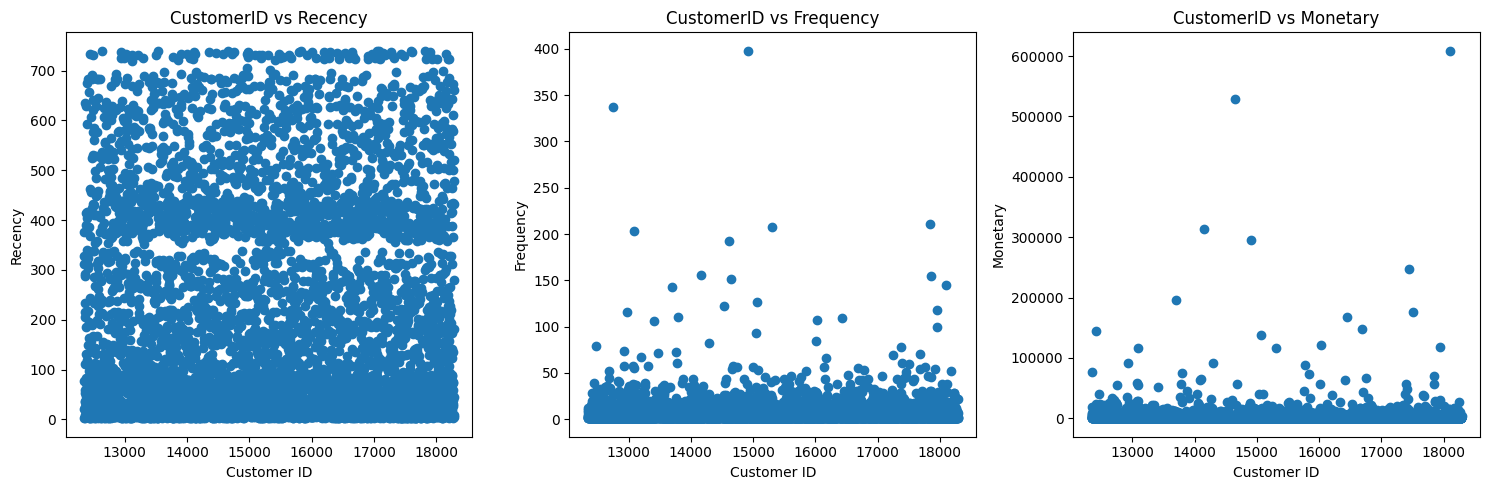

In [30]:
import matplotlib.pyplot as plt

# Assuming dataset is your DataFrame containing the dataset
# If dataset is not defined, define it using your actual dataset

plt.figure(figsize=(15, 5))

# Define the features and titles
features = ['Recency', 'Frequency', 'Monetary']
titles = ['CustomerID vs Recency', 'CustomerID vs Frequency', 'CustomerID vs Monetary']

# Plot the scatter plots
for i, feature in enumerate(features, start=1):
    plt.subplot(1, 3, i)
    plt.scatter(rfm['Customer ID'], rfm[feature])
    plt.xlabel('Customer ID')
    plt.ylabel(feature)
    plt.title(titles[i - 1])

plt.tight_layout()
plt.show()


**Check if there are any zeros in rfm**

In [31]:
rfm.describe([0.01, 0.05, 0.10, 0.25, 0.50, 0.75, 0.90, 0.95, 0.99]).T

,count,mean,std,min,1%,5%,10%,25%,50%,75%,90%,95%,99%,max
Customer ID,5881.00000,15314.67421,1715.42976,12346.00000,12405.80000,12641.00000,12937.00000,13833.00000,15313.00000,16797.00000,17696.00000,17992.00000,18228.20000,18287.00000
Recency,5881.00000,202.45775,209.47413,2.00000,2.00000,5.00000,10.00000,27.00000,97.00000,381.00000,537.00000,627.00000,727.00000,740.00000
Frequency,5881.00000,6.28720,13.01288,1.00000,1.00000,1.00000,1.00000,1.00000,3.00000,7.00000,13.00000,21.00000,46.00000,398.00000
Monetary,5881.00000,3007.21997,14728.32221,0.00000,45.01400,112.34000,161.67000,344.75000,886.57000,2297.66000,5554.89000,9502.26000,29687.31800,608821.65000


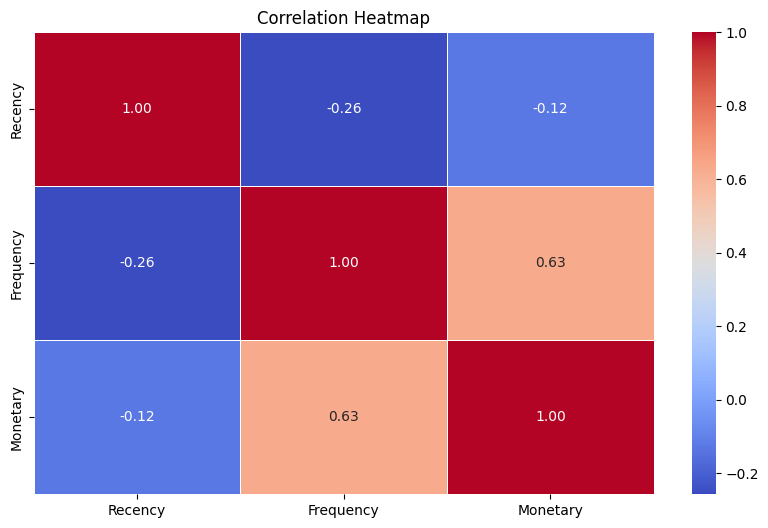

In [32]:
import seaborn as sns 
corr_matrix = rfm.drop(columns=['Customer ID']).corr(method='pearson')
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


<Axes: title={'center': 'Frequency Vs. Recency'}, xlabel='Frequency', ylabel='Recency'>

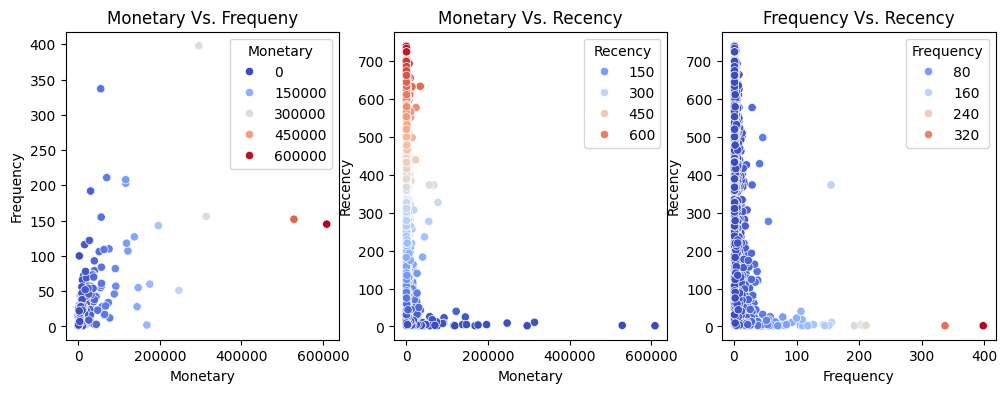

In [33]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.title("Monetary Vs. Frequeny")
sns.scatterplot(x="Monetary", y="Frequency", hue="Monetary", data=rfm, palette="coolwarm")


plt.subplot(1, 3, 2)
plt.title("Monetary Vs. Recency")
sns.scatterplot(x="Monetary", y="Recency",  hue="Recency", data=rfm, palette="coolwarm")

plt.subplot(1, 3, 3)
plt.title("Frequency Vs. Recency")
sns.scatterplot(x="Frequency", y="Recency",  hue="Frequency", data=rfm, palette="coolwarm")

In [34]:
rfm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5881 entries, 0 to 5880
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Customer ID  5881 non-null   float64
 1   Recency      5881 non-null   int64  
 2   Frequency    5881 non-null   int64  
 3   Monetary     5881 non-null   float64
dtypes: float64(2), int64(2)
memory usage: 183.9 KB


In [35]:
rfm.head()

,Customer ID,Recency,Frequency,Monetary
0,12346.00000,327,12,77556.46000
1,12347.00000,3,8,5633.32000
2,12348.00000,76,5,2019.40000
3,12349.00000,20,4,4428.69000
4,12350.00000,311,1,334.40000


### RFM Scores

A lower Recency value indicates that the customer has made a recent purchase, so customers with the smallest Recency should receive the highest score (5).

Higher Frequency and Monetary values indicate that the customer buys more often and spends more, so customers with the largest Frequency and Monetary metrics should be assigned the highest score (5).

In [36]:
rfm["RecencyScore"] = pd.qcut(rfm['Recency'], 5, labels=[5, 4, 3, 2, 1])

rfm["FrequencyScore"] = pd.qcut(rfm['Frequency'].rank(method="first"), 5, labels=[1, 2, 3, 4, 5])

rfm["MonetaryScore"] = pd.qcut(rfm['Monetary'], 5, labels=[1, 2, 3, 4, 5])

In [37]:
rfm["RFM_SCORE"] = (rfm['RecencyScore'].astype(str) +
                    rfm['FrequencyScore'].astype(str) +
                    rfm['MonetaryScore'].astype(str))

rfm.head()

,Customer ID,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,RFM_SCORE
0,12346.00000,327,12,77556.46000,2,5,5,255
1,12347.00000,3,8,5633.32000,5,4,5,545
2,12348.00000,76,5,2019.40000,3,4,4,344
3,12349.00000,20,4,4428.69000,5,3,5,535
4,12350.00000,311,1,334.40000,2,1,2,212


In [38]:
rfm[rfm['RFM_SCORE'] == "555"].head()

,Customer ID,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,RFM_SCORE
16,12362.00000,4,11,5356.23000,5,5,5,555
48,12395.00000,20,15,5067.27000,5,5,5,555
70,12417.00000,4,20,6797.41000,5,5,5,555
86,12433.00000,2,10,20581.26000,5,5,5,555
90,12437.00000,3,39,12683.40000,5,5,5,555


In [39]:
# Ensure the score columns are numeric
rfm['MonetaryScore'] = pd.to_numeric(rfm['MonetaryScore'], errors='coerce')
rfm['RecencyScore'] = pd.to_numeric(rfm['RecencyScore'], errors='coerce')
rfm['FrequencyScore'] = pd.to_numeric(rfm['FrequencyScore'], errors='coerce')


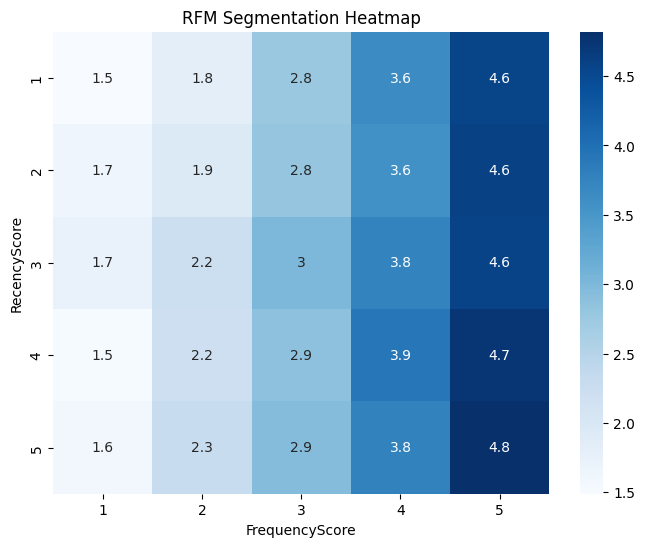

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

rfm_heatmap = rfm.pivot_table(
    index="RecencyScore", 
    columns="FrequencyScore", 
    values="MonetaryScore", 
    aggfunc="mean"
)

plt.figure(figsize=(8,6))
sns.heatmap(rfm_heatmap, annot=True, cmap="Blues")
plt.title("RFM Segmentation Heatmap")
plt.show()


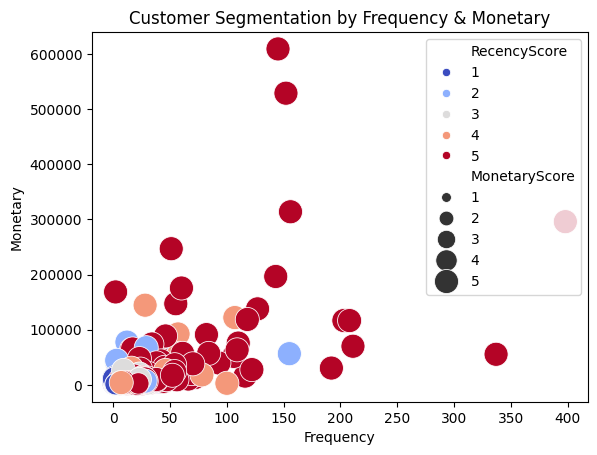

In [41]:
sns.scatterplot(
    x="Frequency", y="Monetary", 
    hue="RecencyScore", size="MonetaryScore",
    data=rfm, palette="coolwarm", sizes=(50, 300)
)
plt.title("Customer Segmentation by Frequency & Monetary")
plt.show()


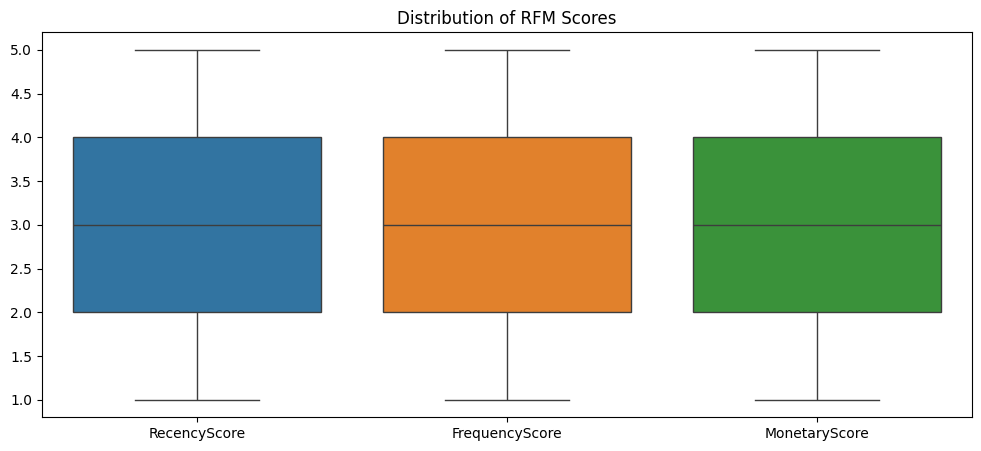

In [42]:
plt.figure(figsize=(12,5))
sns.boxplot(data=rfm[['RecencyScore','FrequencyScore','MonetaryScore']])
plt.title("Distribution of RFM Scores")
plt.show()


we will be using Recency and Frequency scores for customer segmentation. We are assuming that a customer who has recently purchased and who is often purchasing should have high RFM scores.

In [43]:
seg_map = {
    r'[1-2][1-2]': 'Hibernating',
    r'[1-2][3-4]': 'At_Risk',
    r'[1-2]5': 'Cant_Loose',
    r'3[1-2]': 'About_to_Sleep',
    r'33': 'Need_Attention',
    r'[3-4][4-5]': 'Loyal_Customers',
    r'41': 'Promising',
    r'51': 'New_Customers',
    r'[4-5][2-3]': 'Potential_Loyalists',
    r'5[4-5]': 'Champions'
}

In [44]:
rfm['Segment'] = rfm['RecencyScore'].astype(str) + rfm['FrequencyScore'].astype(str)
rfm.head()

,Customer ID,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,RFM_SCORE,Segment
0,12346.00000,327,12,77556.46000,2,5,5,255,25
1,12347.00000,3,8,5633.32000,5,4,5,545,54
2,12348.00000,76,5,2019.40000,3,4,4,344,34
3,12349.00000,20,4,4428.69000,5,3,5,535,53
4,12350.00000,311,1,334.40000,2,1,2,212,21


In [45]:
rfm['Segment'] = rfm['Segment'].replace(seg_map, regex=True)
rfm.head()

,Customer ID,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,RFM_SCORE,Segment
0,12346.00000,327,12,77556.46000,2,5,5,255,Cant_Loose
1,12347.00000,3,8,5633.32000,5,4,5,545,Champions
2,12348.00000,76,5,2019.40000,3,4,4,344,Loyal_Customers
3,12349.00000,20,4,4428.69000,5,3,5,535,Potential_Loyalists
4,12350.00000,311,1,334.40000,2,1,2,212,Hibernating


In [99]:
customer_count = pd.DataFrame()
customer_count['Count']= rfm['Segment'].value_counts()


In [100]:
customer_count.head()

,Count
Segment,
Hibernating,1525
Loyal_Customers,1161
Champions,837
At_Risk,753
Potential_Loyalists,714


In [101]:
customer_count.reset_index(inplace=True)

In [ ]:

customer_count

,Segment,Count
0,Hibernating,1525
1,Loyal_Customers,1161
2,Champions,837
3,At_Risk,753
4,Potential_Loyalists,714
5,About_to_Sleep,384
6,Need_Attention,267
7,Promising,114
8,Cant_Loose,71
9,New_Customers,55


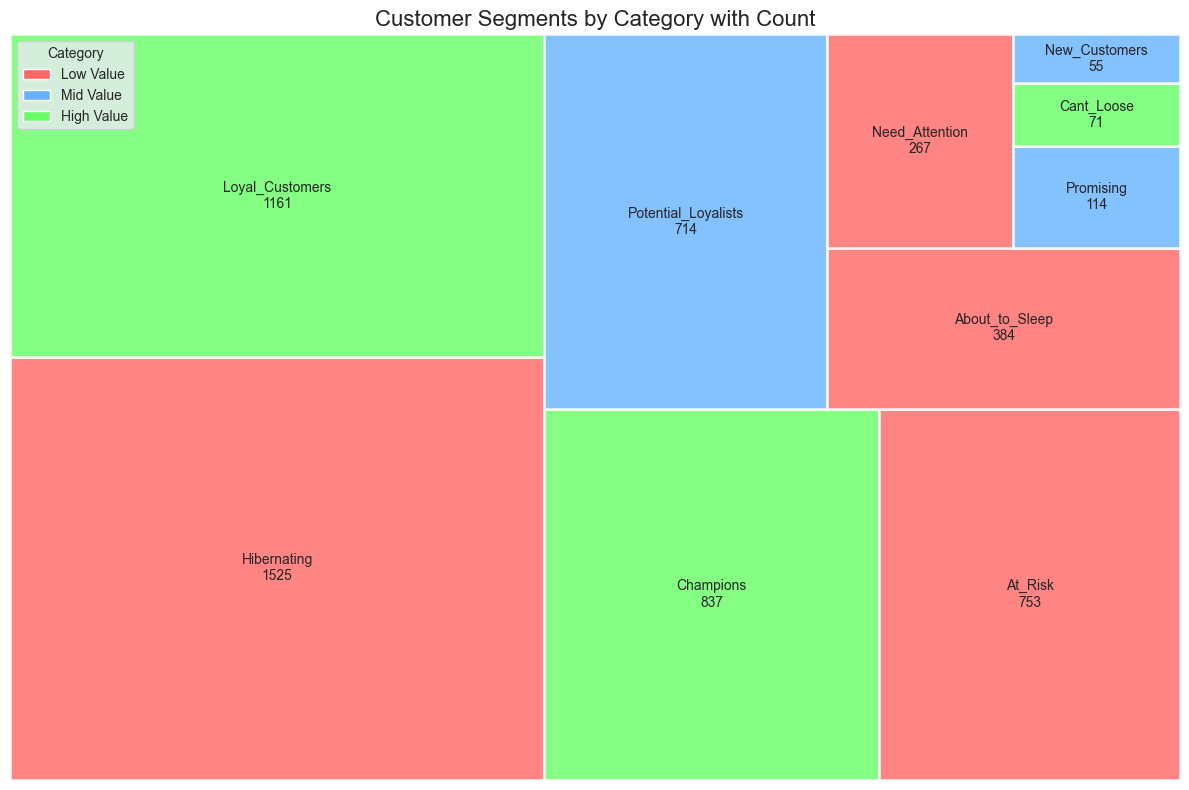

In [119]:
import pandas as pd
import matplotlib.pyplot as plt
import squarify  # pip install squarify
from matplotlib.patches import Patch
import matplotlib as mpl



# Category mapping
category_map = {
    "Hibernating": "Low Value",
    "About_to_Sleep": "Low Value",
    "Need_Attention": "Low Value",
    "At_Risk": "Low Value",
    
    "Promising": "Mid Value",
    "Potential_Loyalists": "Mid Value",
    "New_Customers": "Mid Value",
    
    "Loyal_Customers": "High Value",
    "Champions": "High Value",
    "Cant_Loose": "High Value"
}

customer_count["Category"] = customer_count["Segment"].map(category_map)

# Assign base colors for category
base_color_map = {
    "Low Value": "#FF6666",   # red
    "Mid Value": "#66B2FF",   # blue
    "High Value": "#66FF66"   # green
}
customer_count["BaseColor"] = customer_count["Category"].map(base_color_map)

# To show count in legend, we can vary alpha by count
norm = mpl.colors.Normalize(vmin=customer_count["Count"].min(), vmax=customer_count["Count"].max())
colors = [mpl.cm.viridis(norm(x)) for x in customer_count["Count"]]

# Plot treemap
plt.figure(figsize=(12, 8))
squarify.plot(
    sizes=customer_count["Count"],
    label=[f"{seg}\n{cnt}" for seg, cnt in zip(customer_count["Segment"], customer_count["Count"])],
    color=customer_count["BaseColor"],
    alpha=0.8,
    edgecolor="white",
    linewidth=2
)

plt.title("Customer Segments by Category with Count", fontsize=16)
plt.axis("off")

# Legend for categories
legend_elements = [Patch(facecolor=color, label=cat) for cat, color in base_color_map.items()]
plt.legend(handles=legend_elements, title="Category", loc="upper left")

plt.show()


In [ ]:
rfm['Segment'].value_counts()

Segment
Hibernating            1525
Loyal_Customers        1161
Champions               837
At_Risk                 753
Potential_Loyalists     714
About_to_Sleep          384
Need_Attention          267
Promising               114
Cant_Loose               71
New_Customers            55
Name: count, dtype: int64

#### Taking Action !

Now that we’ve assigned scores to all customers and segmented them into 10 distinct groups, the next step is to take action. Instead of relying on the scores themselves, we’ll use the underlying metrics to guide our decisions. Our focus will be on the segments that require stronger customer relationships, identifying strategies to encourage them to purchase more often and develop loyalty. The advantage of using RFM segmentation is that it clearly highlights what each group specifically needs.

In [47]:
rfm[["Segment", "Recency", "Frequency", "Monetary"]].groupby("Segment").agg(["mean", "count"])

Recency       Frequency          Monetary      
                         mean count      mean count        mean count
Segment                                                              
About_to_Sleep      107.97656   384   1.35938   384   532.98639   384
At_Risk             373.67198   753   3.90438   753  1375.75028   753
Cant_Loose          332.22535    71  15.92958    71  8327.81552    71
Champions             9.56033   837  19.34170   837 10873.31177   837
Hibernating         460.55082  1525   1.25246  1525   435.42767  1525
Loyal_Customers      68.06891  1161   9.83893  1161  4195.98500  1161
Need_Attention      114.52060   267   3.14981   267  1276.65592   267
New_Customers        11.56364    55   1.00000    55   353.20582    55
Potential_Loyalists  26.75630   714   2.59104   714  1149.14637   714
Promising            39.83333   114   1.00000   114   318.13421   114

In [48]:
rfm[rfm["Segment"] == "Need_Attention"].head()

,Customer ID,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,RFM_SCORE,Segment
26,12372.00000,73,3,1298.04000,3,3,4,334,Need_Attention
33,12379.00000,83,4,1620.22000,3,3,4,334,Need_Attention
66,12413.00000,68,4,999.45000,3,3,3,333,Need_Attention
71,12418.00000,114,4,2021.20000,3,3,4,334,Need_Attention
77,12424.00000,164,4,3340.03000,3,3,5,335,Need_Attention


**Can't_Loose** segment has purchased for 9 times this year but the last date of this was nearly 4 months, they spend a good amount of money and they used to be our loyal customers, we can't loose them. We should put this 77 customers into our loyalty program, offer them seasonal discounts, make them feel special while purchasing from our company and make them loyal again. We can export the customer id list into an excel file and pass this file to our Marketing Department.  

In [49]:
marketing_df = rfm[rfm["Segment"] == "Cant_Loose"][["Customer ID", "RFM_SCORE"]]
marketing_df.head()

,Customer ID,RFM_SCORE
0,12346.00000,255
135,12482.00000,155
407,12755.00000,255
487,12835.00000,155
524,12872.00000,255


In [50]:
marketing_df.head()

,Customer ID,RFM_SCORE
0,12346.00000,255
135,12482.00000,155
407,12755.00000,255
487,12835.00000,155
524,12872.00000,255



# 📊 Customer Segmentation Analysis (RFM-Based)

---

## 1. Champions (837 customers)
**Profile:** High Recency, High Frequency, High Monetary.  
**Business Meaning:** These are your best customers – they purchase often, spend the most, and engage recently.  
**Strategy:** Reward them with loyalty programs, exclusive offers, or early access to new products. Keep them delighted to maintain retention.  

---

## 2. Loyal Customers (1161 customers)
**Profile:** Frequent buyers, though not necessarily the biggest spenders.  
**Business Meaning:** Very engaged with the brand. They may not always spend heavily, but their repeated purchases drive steady revenue.  
**Strategy:** Upsell and cross-sell. Encourage referrals. Keep engagement high with personalized recommendations.  

---

## 3. Potential Loyalists (714 customers)
**Profile:** New or relatively recent customers showing strong potential to become loyal.  
**Business Meaning:** These customers are at a turning point – they could become long-term valuable customers if nurtured.  
**Strategy:** Offer incentives (discounts, targeted campaigns). Convert them into loyal customers through tailored experiences.  

---

## 4. New Customers (55 customers)
**Profile:** Recent buyers with low purchase history.  
**Business Meaning:** Just entered the ecosystem – early engagement will determine their future lifetime value.  
**Strategy:** Onboard them well, educate them about your offerings, and build trust. Provide a smooth first experience.  

---

## 5. Promising (114 customers)
**Profile:** Recently active, but with relatively lower frequency and spending.  
**Business Meaning:** They are engaged but haven’t developed strong purchase habits yet.  
**Strategy:** Nudge them with reminders, personalized deals, or introductory loyalty benefits to build stronger connections.  

---

## 6. Need Attention (267 customers)
**Profile:** Moderate frequency and spending but becoming less active recently.  
**Business Meaning:** Customers who were once engaged but are now slipping away.  
**Strategy:** Re-engagement campaigns (special offers, personalized emails). Remind them of what they’re missing.  

---

## 7. At Risk (753 customers)
**Profile:** Used to be good customers but haven’t purchased in a long time.  
**Business Meaning:** They are at risk of churn, representing lost revenue if not recovered.  
**Strategy:** Win-back campaigns (discounts, feedback requests, tailored offers). Show appreciation to bring them back.  

---

## 8. Cant Lose Them (71 customers)
**Profile:** Previously high spenders and frequent buyers, now inactive.  
**Business Meaning:** Extremely valuable customers who are on the verge of churn. Losing them would be a major loss.  
**Strategy:** Priority recovery – reach out with VIP offers, personal calls, or custom deals. Treat them with exclusivity.  

---

## 9. Hibernating (1525 customers)
**Profile:** Very low recency, frequency, and spending.  
**Business Meaning:** These are dormant customers with minimal recent activity.  
**Strategy:** Low-cost reactivation (seasonal campaigns, mass emails). Consider whether investing in them is worthwhile compared to higher-value groups.  

---

## 10. About to Sleep (384 customers)
**Profile:** Purchases were infrequent and not recent, but they have bought before.  
**Business Meaning:** Customers on the edge of slipping into inactivity.  
**Strategy:** Engage them before they churn – reminders, limited-time offers, or personalized product recommendations.  

---

# Strategic Takeaways
- **High Value** (Champions, Loyal Customers, Cant Lose Them) → Drive retention & rewards.  
- **Mid Value** (Potential Loyalists, Promising, New Customers) → Focus on growth & conversion to loyalty.  
- **Low Value** (At Risk, Need Attention, About to Sleep, Hibernating) → Focus on recovery & cost-effective reactivation.  


## Learning Based Clustering Using K Means and Hierarchical - Average and Complete

In [51]:
from sklearn.preprocessing import StandardScaler

# Select features for clustering
features = rfm[["Recency", "Frequency", "Monetary"]]

# Scale the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

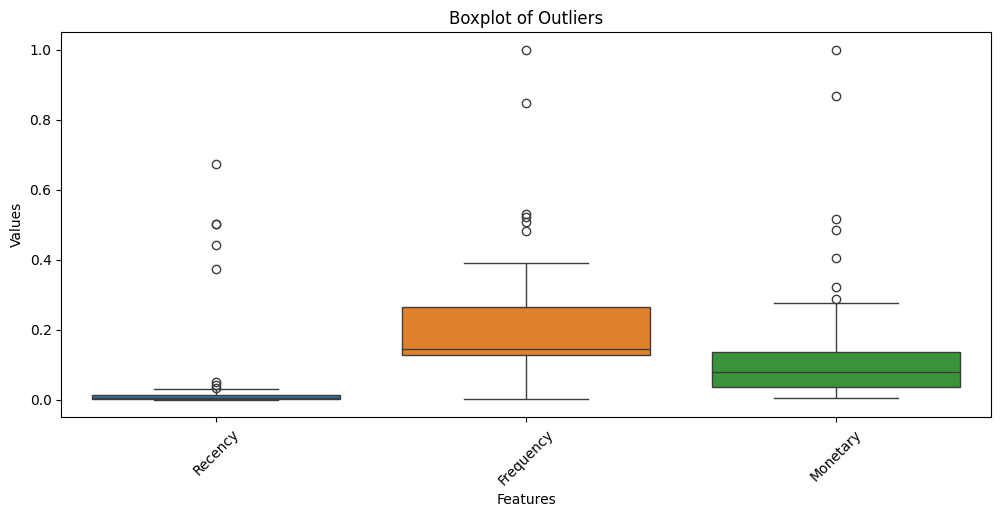

Outlier rows: 71


In [52]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import zscore


# 1. Normalize dataset using MinMaxScaler
scaler = MinMaxScaler()
dataset_normalized = pd.DataFrame(scaler.fit_transform(features), columns=features.columns)

# 2. Find outliers using scipy z score
z_scores = zscore(dataset_normalized)

# Define threshold for identifying outliers (e.g., Z-score > 3 or < -3)
threshold = 3

# Identify outliers
outliers = (z_scores > threshold) | (z_scores < -threshold)

# 3. Visualize outliers using box plot
plt.figure(figsize=(12, 5))
sns.boxplot(data=dataset_normalized[outliers.any(axis=1)])
plt.title('Boxplot of Outliers')
plt.xlabel('Features')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.show()

# 4. Remove outliers and update the dataset
dataset_cleaned = dataset_normalized[~outliers.any(axis=1)]

print("Outlier rows:",features[outliers.any(axis=1)].shape[0])


# 5. Apply inverse_transform to inverse the normalization
dataset = pd.DataFrame(scaler.inverse_transform(dataset_cleaned), columns=dataset_cleaned.columns)


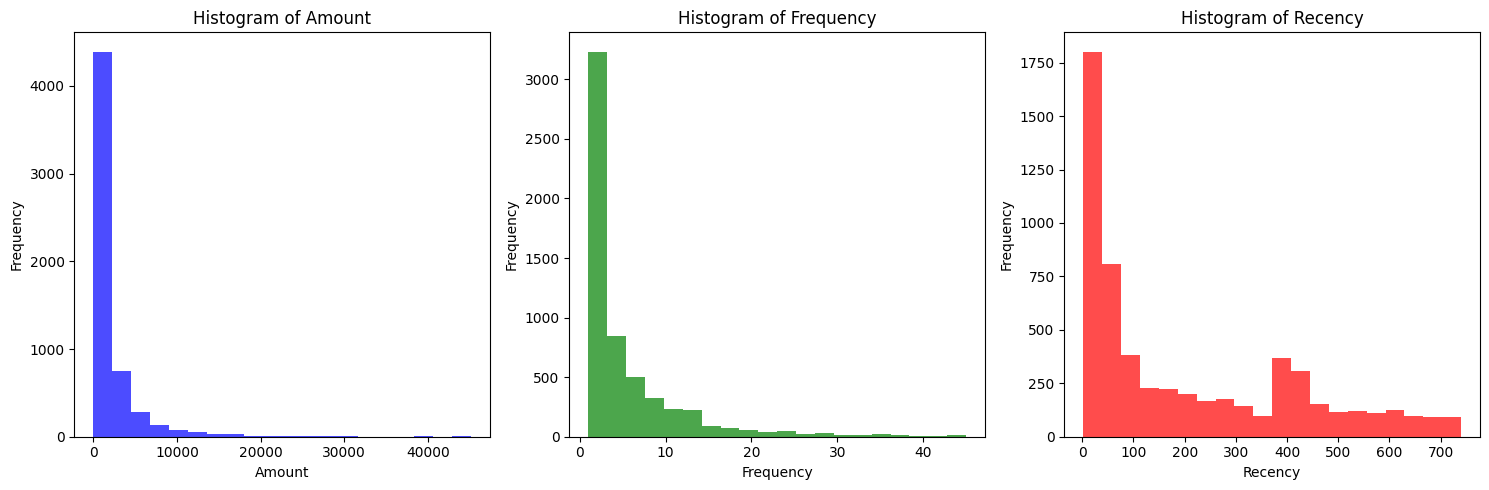

In [54]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming dataset is your DataFrame containing the features Amount, Frequency, and Recency

# Plot histogram for each feature
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Plot histogram for Amount
axes[0].hist(dataset['Monetary'], bins=20, color='blue', alpha=0.7)
axes[0].set_title('Histogram of Amount')
axes[0].set_xlabel('Amount')
axes[0].set_ylabel('Frequency')

# Plot histogram for Frequency
axes[1].hist(dataset['Frequency'], bins=20, color='green', alpha=0.7)
axes[1].set_title('Histogram of Frequency')
axes[1].set_xlabel('Frequency')
axes[1].set_ylabel('Frequency')

# Plot histogram for Recency
axes[2].hist(dataset['Recency'], bins=20, color='red', alpha=0.7)
axes[2].set_title('Histogram of Recency')
axes[2].set_xlabel('Recency')
axes[2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


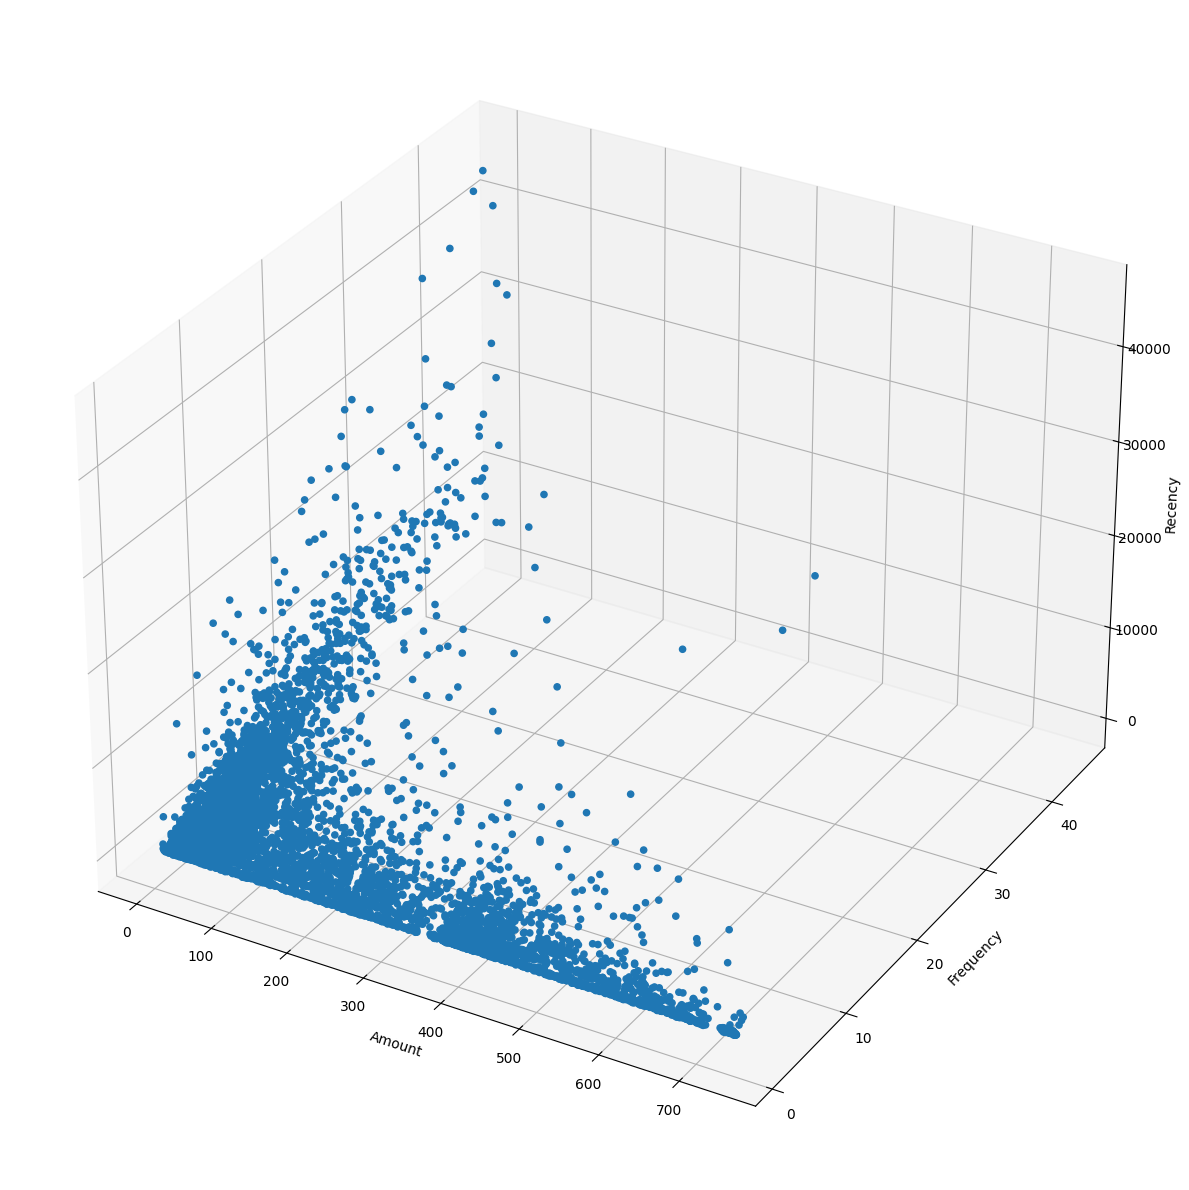

In [55]:
plt.rcParams["figure.figsize"] = [12.00, 5.50]
plt.rcParams["figure.autolayout"] = True
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(dataset.iloc[:, 0], dataset.iloc[:, 1], dataset.iloc[:, 2],alpha=1)
ax.set_xlabel('Amount')
ax.set_ylabel('Frequency')
ax.set_zlabel('Recency')
plt.show()


In [56]:
scaler = StandardScaler()
dataset_scaled = scaler.fit_transform(dataset)
dataset_scaled.shape

(5810, 3)

#### Finding the Best Value N Cluster using Elbow method.

#### **1. Inertia Analysis or Elbow Choice**

The KMeans algorithm clusters data by trying to separate samples in $n$ groups of equal variances, minimizing a criterion known as ***inertia***, or ***within-cluster sum-of-squares Inertia***, or the ***within-cluster sum of squares criterion***, 

***Inertia*** can be recognized as a measure of how internally coherent clusters are.

When plotting the inertia as a function of the number of clusters `K`, the curve often contains as inflexion point called the ***Elbow***. The fall where the Elbow is constructed, the respective point is taken as value of `K` as it to has the low inertia.

In [58]:
from sklearn.cluster import KMeans
variations = []
range_n_clusters = range(1,15)
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(dataset_scaled)
    variations.append(kmeans.inertia_)

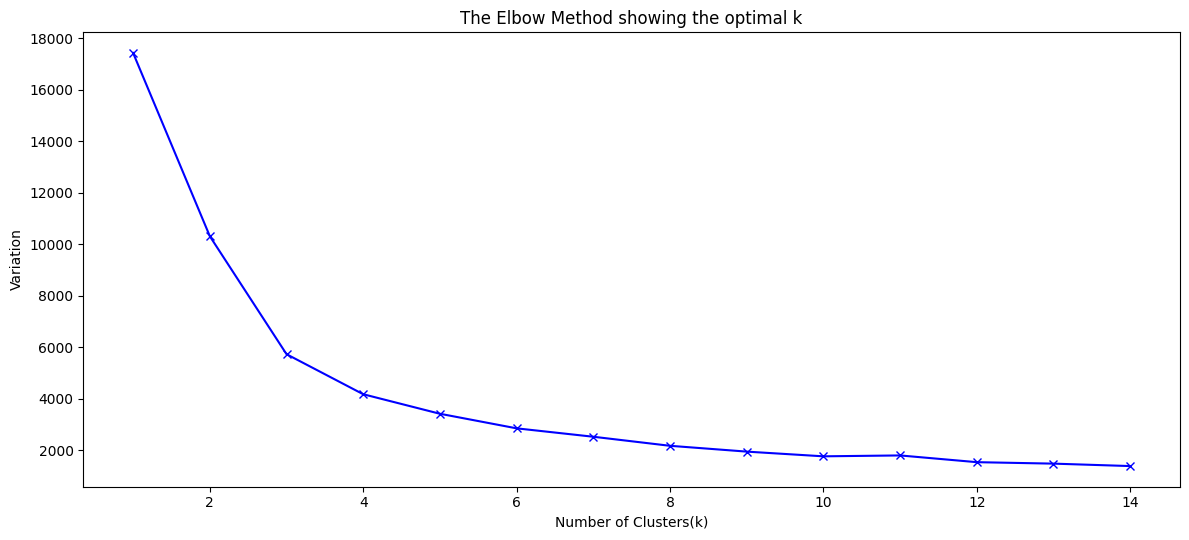

In [59]:
plt.plot(range_n_clusters, variations, 'bx-')
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Variation')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [60]:

from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree
%matplotlib inline

In [61]:
kmeans = KMeans(n_clusters=3, max_iter=50)
kmeans.fit(dataset_scaled)
print(kmeans)

KMeans(max_iter=50, n_clusters=3)


In [62]:
centroids = kmeans.cluster_centers_

In [63]:
centroids

array([[-0.79789765,  2.63794297,  2.55095884],
       [-0.61850988, -0.05636268, -0.11524942],
       [ 1.24543637, -0.51606087, -0.39492703]])

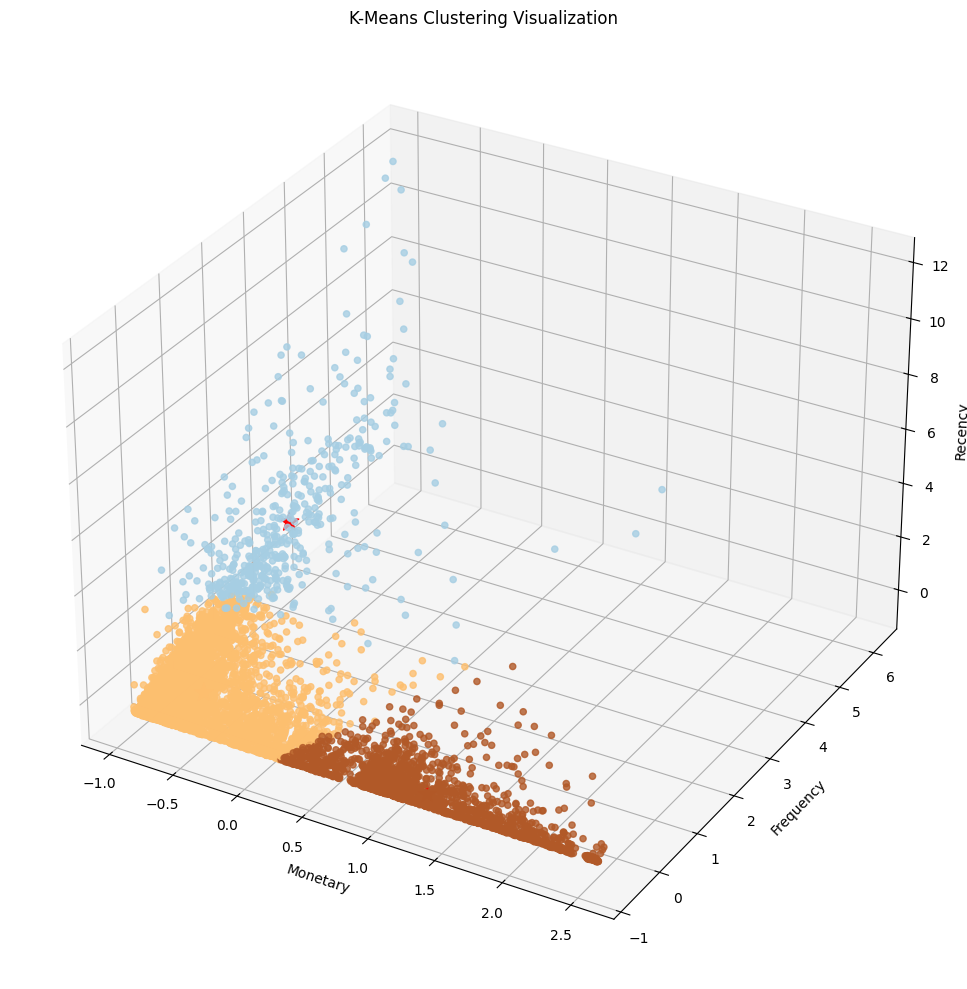

In [65]:

plt.rcParams["figure.figsize"] = [12.00, 5.50]
plt.rcParams["figure.autolayout"] = True
centroids = kmeans.cluster_centers_

fig = plt.figure(figsize=(14,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(dataset_scaled[:, 0], dataset_scaled[:, 1], dataset_scaled[:, 2], c=kmeans.labels_, alpha=0.8, cmap='Paired')
ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], c='red', marker='*', s=200, alpha=1)
ax.set_xlabel('Monetary')
ax.set_ylabel('Frequency')
ax.set_zlabel('Recency')
plt.title('K-Means Clustering Visualization')
plt.show()



In [66]:
kmeans.labels_

array([1, 1, 1, ..., 2, 2, 1], shape=(5810,), dtype=int32)

In [67]:
dataset['km_clusters'] = kmeans.labels_

In [68]:
dataset['km_clusters'] = kmeans.labels_

In [69]:
# Convert Recency and Frequency to integers
dataset["Recency"] = dataset["Recency"].astype(int)
dataset["Frequency"] = dataset["Frequency"].astype(int)
dataset["Monetary"] = dataset["Monetary"].astype(int)

# Round Monetary to 2 decimals and remove .00 if not needed
# dataset["Monetary"] = dataset["Monetary"].map(lambda x: int(x) if x == int(x) else round(x, 1))


In [70]:
dataset

,Recency,Frequency,Monetary,km_clusters
0,2,8,5633,1
1,76,5,2019,1
2,20,4,4428,1
3,311,1,334,2
4,376,1,300,2
...,...,...,...,...
5805,5,22,2664,0
5806,433,1,461,2
5807,662,1,427,2
5808,478,2,1296,2


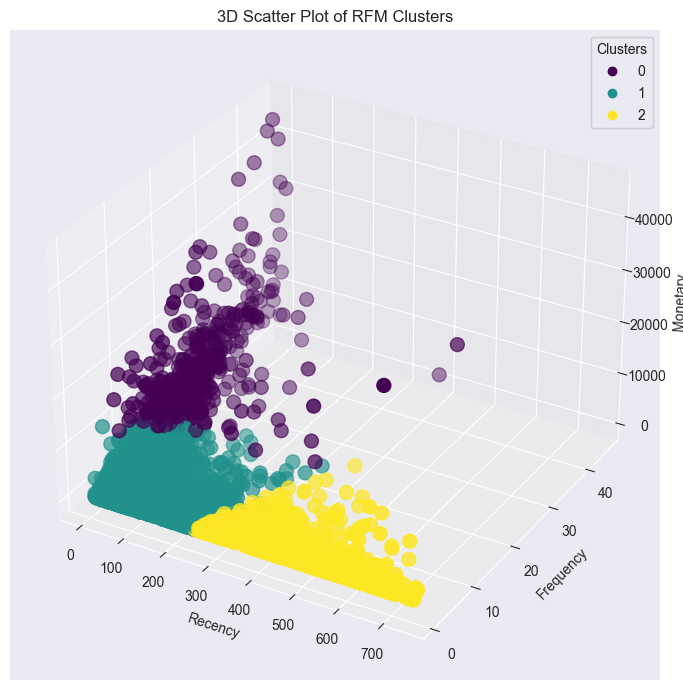

In [111]:
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with cluster colors
scatter = ax.scatter(
    dataset['Recency'], 
    dataset['Frequency'], 
    dataset['Monetary'], 
    c=dataset['km_clusters'], 
    cmap='viridis', 
    s=100
)

# Labels
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
plt.title('3D Scatter Plot of RFM Clusters')

# Legend
legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend1)

plt.show()

#### AgglomerativeClustering

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree
%matplotlib inline

sns.set_style('darkgrid')
sns.set_palette('Set2')

**1. Linkage Criteria method  as `average`**

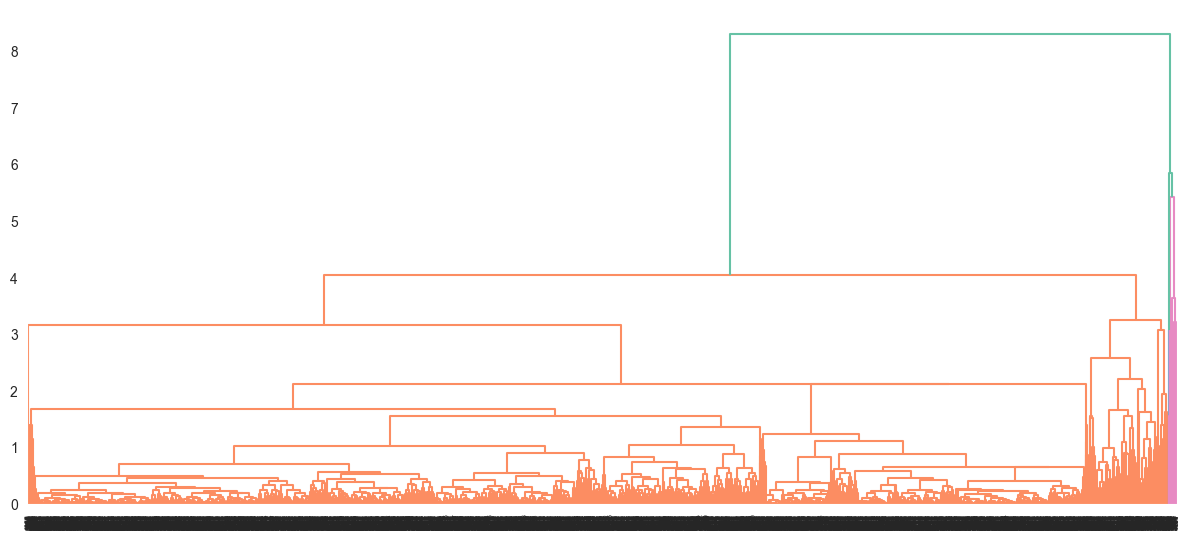

In [73]:
mergings = linkage(dataset_scaled, method="average", metric='euclidean')
dendrogram(mergings)
plt.show()

In [74]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import numpy as np

# Assume dataset_scaled contains your standardized RFM features
X = dataset_scaled  

silhouette_scores = {}
possible_n = range(2, 11)  # test between 2 and 10 clusters

for n in possible_n:
    model = AgglomerativeClustering(n_clusters=n, linkage='average')  
    cluster_labels = model.fit_predict(dataset_scaled)
    score = silhouette_score(X, cluster_labels)
    silhouette_scores[n] = score
    print(f"For n_clusters = {n}, silhouette score = {score:.4f}")

# Best number of clusters
best_n = max(silhouette_scores, key=silhouette_scores.get)
print(f"\n✅ Best number of clusters based on silhouette: {best_n}")


For n_clusters = 2, silhouette score = 0.7667
For n_clusters = 3, silhouette score = 0.7599
For n_clusters = 4, silhouette score = 0.7403
For n_clusters = 5, silhouette score = 0.5968
For n_clusters = 6, silhouette score = 0.5949
For n_clusters = 7, silhouette score = 0.5584
For n_clusters = 8, silhouette score = 0.5583
For n_clusters = 9, silhouette score = 0.4669
For n_clusters = 10, silhouette score = 0.4668

✅ Best number of clusters based on silhouette: 2


In [75]:
cluster_labels = cut_tree(mergings, n_clusters=best_n).reshape(-1, )
cluster_labels

array([0, 0, 0, ..., 0, 0, 0], shape=(5810,))

In [76]:
dataset['h_clusters_average'] = cluster_labels
dataset.head()
# dataset.drop(columns=['km_clusters'], inplace=True)

,Recency,Frequency,Monetary,km_clusters,h_clusters_average
0,2,8,5633,1,0
1,76,5,2019,1,0
2,20,4,4428,1,0
3,311,1,334,2,0
4,376,1,300,2,0


#### **Cluster Visualization with their respective labeling**

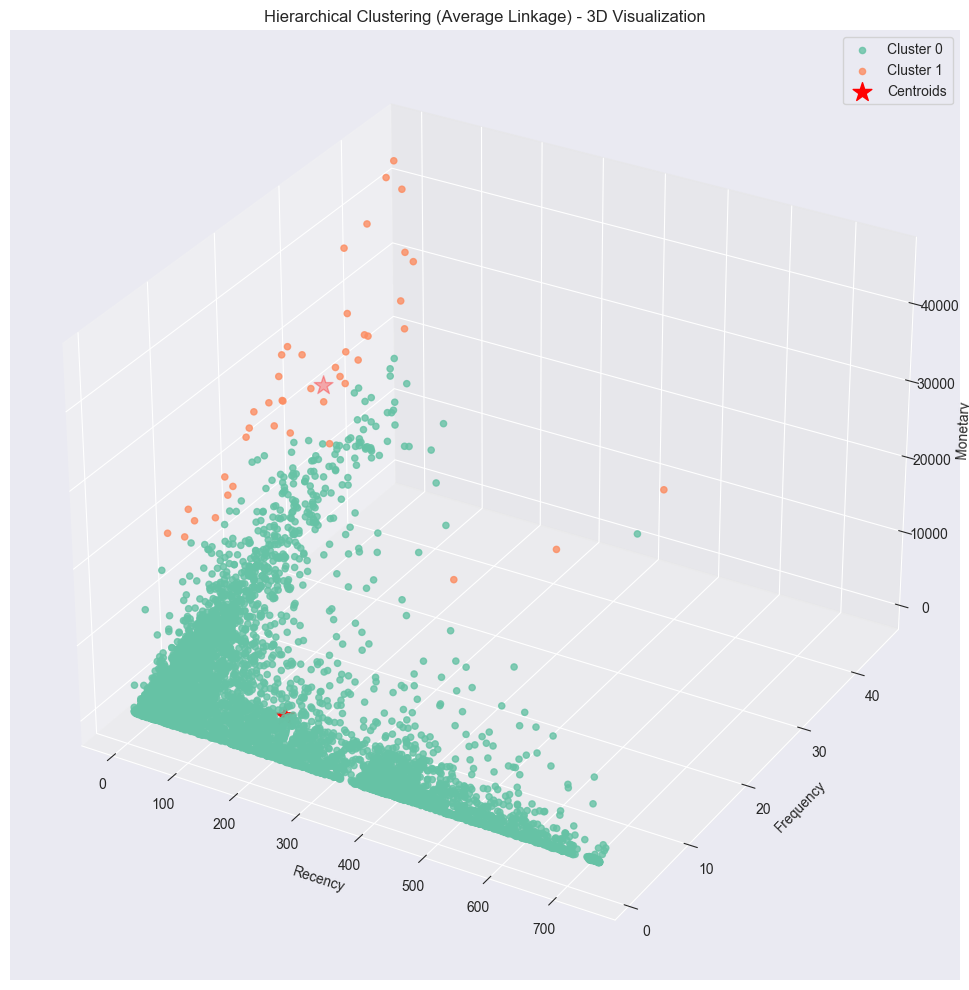

In [77]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np


monetary = dataset['Monetary'].values
frequency = dataset['Frequency'].values
recency = dataset['Recency'].values

fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# Plot points per hierarchical cluster
for cluster in dataset['h_clusters_average'].unique():
    indices = dataset['h_clusters_average'] == cluster
    ax.scatter(
        recency[indices],
        frequency[indices],
        monetary[indices],
        label=f'Cluster {cluster}',
        alpha=0.8
    )

# Calculate centroids per cluster
centroids = dataset.groupby('h_clusters_average')[['Recency', 'Frequency', 'Monetary']].mean()

# Plot centroids
ax.scatter(
    centroids['Recency'],
    centroids['Frequency'],
    centroids['Monetary'],
    c='red',
    marker='*',
    s=200,
    label='Centroids'
)

# Labels and title
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
plt.title('Hierarchical Clustering (Average Linkage) - 3D Visualization')

# Legend
ax.legend()
plt.show()




### Silhouette Method for finding the number of clusters

In [79]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import numpy as np

# Assume dataset_scaled contains your standardized RFM features
X = dataset_scaled  

silhouette_scores = {}
possible_n = range(2, 11)  # test between 2 and 10 clusters

for n in possible_n:
    model = AgglomerativeClustering(n_clusters=n, linkage='complete')  
    cluster_labels = model.fit_predict(dataset_scaled)
    score = silhouette_score(X, cluster_labels)
    silhouette_scores[n] = score
    print(f"For n_clusters = {n}, silhouette score = {score:.4f}")

# Best number of clusters
best_n = max(silhouette_scores, key=silhouette_scores.get)
print(f"\n✅ Best number of clusters based on silhouette: {best_n}")


For n_clusters = 2, silhouette score = 0.7894
For n_clusters = 3, silhouette score = 0.6304
For n_clusters = 4, silhouette score = 0.6298
For n_clusters = 5, silhouette score = 0.5974
For n_clusters = 6, silhouette score = 0.5974
For n_clusters = 7, silhouette score = 0.5407
For n_clusters = 8, silhouette score = 0.4739
For n_clusters = 9, silhouette score = 0.4747
For n_clusters = 10, silhouette score = 0.3964

✅ Best number of clusters based on silhouette: 2


**2. Linkage Criteria method  as `complete`**

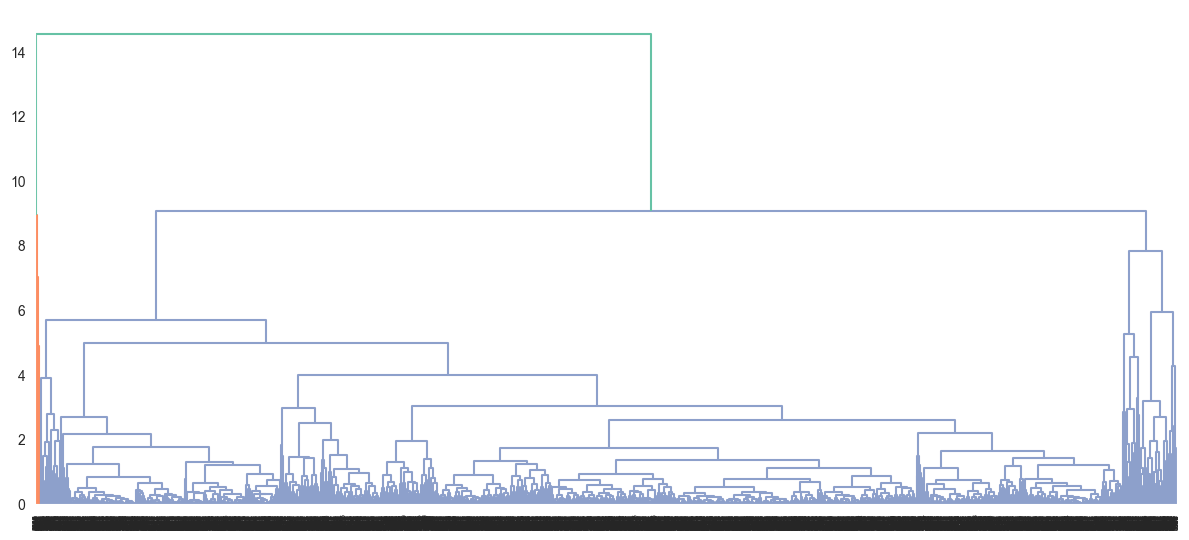

In [78]:
mergings = linkage(dataset_scaled, method="complete", metric='euclidean')
dendrogram(mergings)
plt.show()

In [82]:
cluster_labels = cut_tree(mergings, n_clusters=best_n).reshape(-1, )
dataset['h_clusters_complete'] = cluster_labels
# dataset.drop(columns=['h_clusters_average'], inplace=True)
print(dataset.head())

   Recency  Frequency  Monetary  km_clusters  h_clusters_complete
0        2          8      5633            1                    0
1       76          5      2019            1                    0
2       20          4      4428            1                    0
3      311          1       334            2                    0
4      376          1       300            2                    0


In [112]:
#### **Cluster Visualization with their respective labeling**

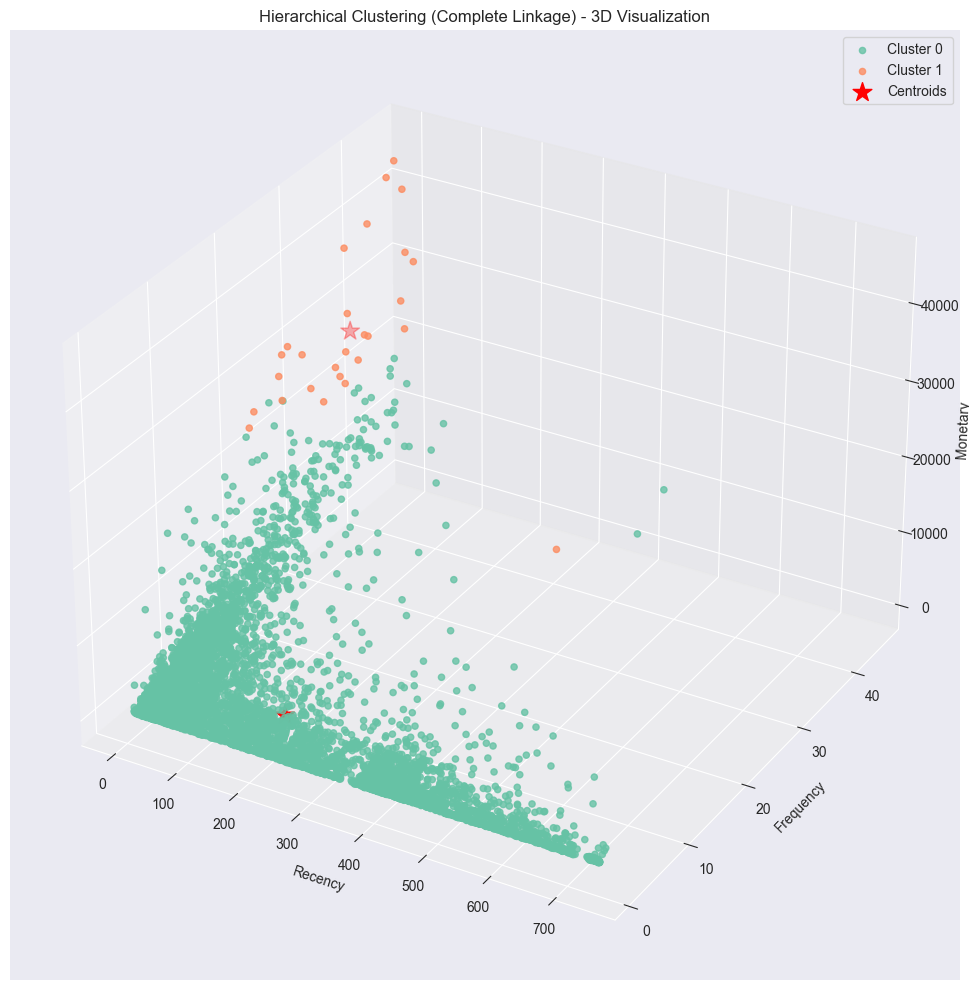

In [83]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np


monetary = dataset['Monetary'].values
frequency = dataset['Frequency'].values
recency = dataset['Recency'].values

fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# Plot points per hierarchical cluster
for cluster in dataset['h_clusters_complete'].unique():
    indices = dataset['h_clusters_complete'] == cluster
    ax.scatter(
        recency[indices],
        frequency[indices],
        monetary[indices],
        label=f'Cluster {cluster}',
        alpha=0.8
    )

# Calculate centroids per cluster
centroids = dataset.groupby('h_clusters_complete')[['Recency', 'Frequency', 'Monetary']].mean()

# Plot centroids
ax.scatter(
    centroids['Recency'],
    centroids['Frequency'],
    centroids['Monetary'],
    c='red',
    marker='*',
    s=200,
    label='Centroids'
)

# Labels and title
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
plt.title('Hierarchical Clustering (Complete Linkage) - 3D Visualization')

# Legend
ax.legend()
plt.show()



#### Analysis of Cutomer Cluster

The study of `K-means clustering` and `Hierarchical clustering` describes the orientation of several features associated with the customers.
> - **Analysis of K-Means Clustering:**
>  The diagram from K-Means clustering provides insights on customer segmentation based on amount, frequency, and the recency behavior. We can see the formation of three clusters of the customer.
> - **Cluster 0:** Cluster 0 has the lowest amount value along with the amount in negative, which might be the cluster of customers who are using some sort of discount or who owe the company money. Similarly, those customers have high recency values and low frequency. This cluster indicates the customers who are less frequent, and who are purchasing with some offers or discounts with low transaction amounts. This cluster of customers may not benefit the company.
> - **Cluster 1:** Cluster 1 has the customer with transaction amount wide populated between 0 to 6000. Moreover, the frequency is also widely spread, and has low recency values. The high frequency and low recency represent their active purchasing behavior. This cluster represents the most active group of customers who are benefiting the company.
>  - **Cluster 2:** Cluster 2 represents the group of customers with medium active buying history. The transaction amount spread is up to 3000, and has a few frequencies in comparison to cluster 1. They also possess smaller recency in comparison to cluster 0. The customers in this cluster are high in density, meaning most of the customers are of the medium purchase history category.

> - **Analysis of Hierarchical Clustering (Linkage criteria - average):**
> - **Cluster 0:** Cluster 0 has densely populated data points representing the customers who have a purchasing behavior of the lowest amount value  Similarly, those customers have high recency values and low frequency.  The customer frequency is highly populated between 0 and 250. This cluster indicates the customers with medium frequent buying behavior in a larger time gap than cluster 1. 
> - **Cluster 1:** Cluster 1 has the customer with transaction amount wide populated between 0 to 6000. Moreover, the frequency is also widely spread, and has low recency values. The high frequency and low recency represent their active purchasing behavior. This cluster represents the most active group of customers who are benefiting the company. 
>  - **Cluster 2:** Cluster 2 represents the group of customers with very high recency but with high frequency. The customers in this cluster shop frequently but in greater time gap. The no of such customers is very low.

> - **Analysis of Hierarchical Clustering (Linkage criteria - complete):**
>   The diagram exhibits the similar cluster as that of K-Means clustering.
> - **Cluster 0:** Cluster 0 represents the group of customers that have a low amount of buying history. These customers also tend to buy things frequently but after a long period. Similarly, those customers have high recency values and medium frequency.  The customer frequency is highly populated between 0 and 250. 
> - **Cluster 1:** Cluster 1 has the customer with transaction amount wide populated between 2000 to 6000. Moreover, the frequency is also widely spread and has low recency values. The high frequency and low recency represent their active purchasing behavior. This cluster represents the most active group of customers who are benefiting the company. 
>  - **Cluster 2:** Cluster 2 represents the group of customers with low receny but medium frequency. The customers in this cluster shop frequently but in smaller periods. However, they tend to purchase the item with a low cost amount(below 4000).


